## Important Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pickle
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,recall_score,accuracy_score,classification_report,precision_score
from imblearn.over_sampling import SMOTE

## Read Data and Show it

In [2]:
data=pd.read_csv('titanic.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Show Data Information and its description

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data Cleansing

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data.drop('Cabin',axis=1,inplace=True)

In [8]:
data['Age'].median()

28.0

In [9]:
data['Age'].fillna(data['Age'].median(),inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\2124576783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(),inplace=True)


In [10]:
data['Age']=data['Age'].apply(round)

In [11]:
data['Age']=data['Age'].astype('Int64')

In [12]:
data['Embarked'].mode().values[0]

'S'

In [13]:
data['Embarked'].fillna(data['Embarked'].mode().values[0],inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\740012155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Embarked'].fillna(data['Embarked'].mode().values[0],inplace=True)


In [14]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    Int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: Int64(1), float64(1), int64(5), object(4)
memory usage: 77.6+ KB


In [17]:
data['Is_Survived']=data['Survived']

In [18]:
data.drop('Survived',axis=1,inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          891 non-null    Int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Is_Survived  891 non-null    int64  
dtypes: Int64(1), float64(1), int64(5), object(4)
memory usage: 77.6+ KB


## Data Analysis and Visualization

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\715067724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Fare',y='Is_Survived',orient='h',palette='magma')


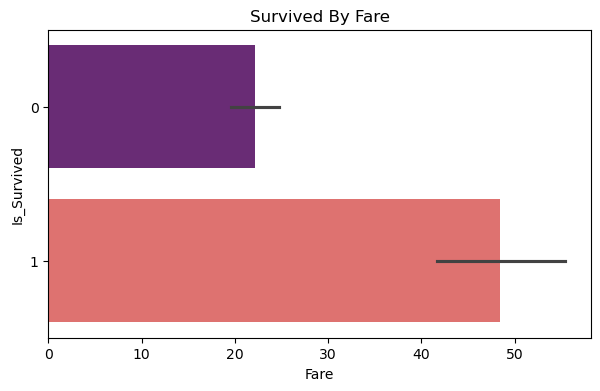

In [20]:
plt.figure(figsize=(7,4))
plt.title('Survived By Fare')
sns.barplot(data=data,x='Fare',y='Is_Survived',orient='h',palette='magma')
plt.show()

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\138724733.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\138724733.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\138724733.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=cm.get_cmap('coolwarm')


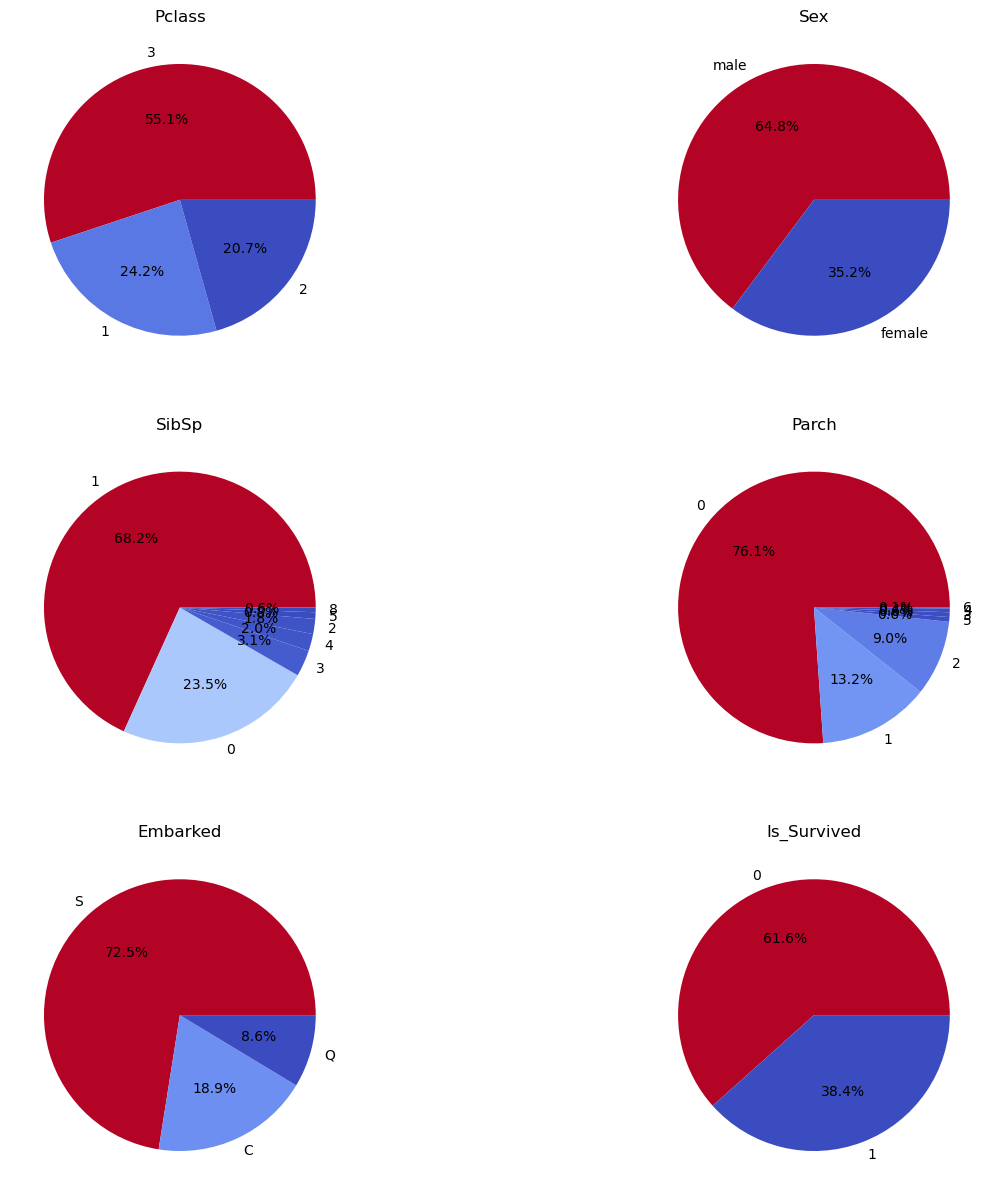

In [27]:
plt.figure(figsize=(15,15))
index=1
for col in data.columns:
    if data[col].nunique()<=10:
        plt.subplot(3,2,index)
        plt.title(col)
        cmap=cm.get_cmap('coolwarm')
        norm=plt.Normalize(min(data[col].value_counts()),max(data[col].value_counts()))
        colors=cmap(norm(data[col].value_counts()))
        plt.pie(x=data[col].value_counts(),labels=data[col].unique(),colors=colors,autopct="%1.1f%%")
        index+=1
plt.show()        

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\2648463017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Fare',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\2648463017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Fare',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\2648463017.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Fare',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykern

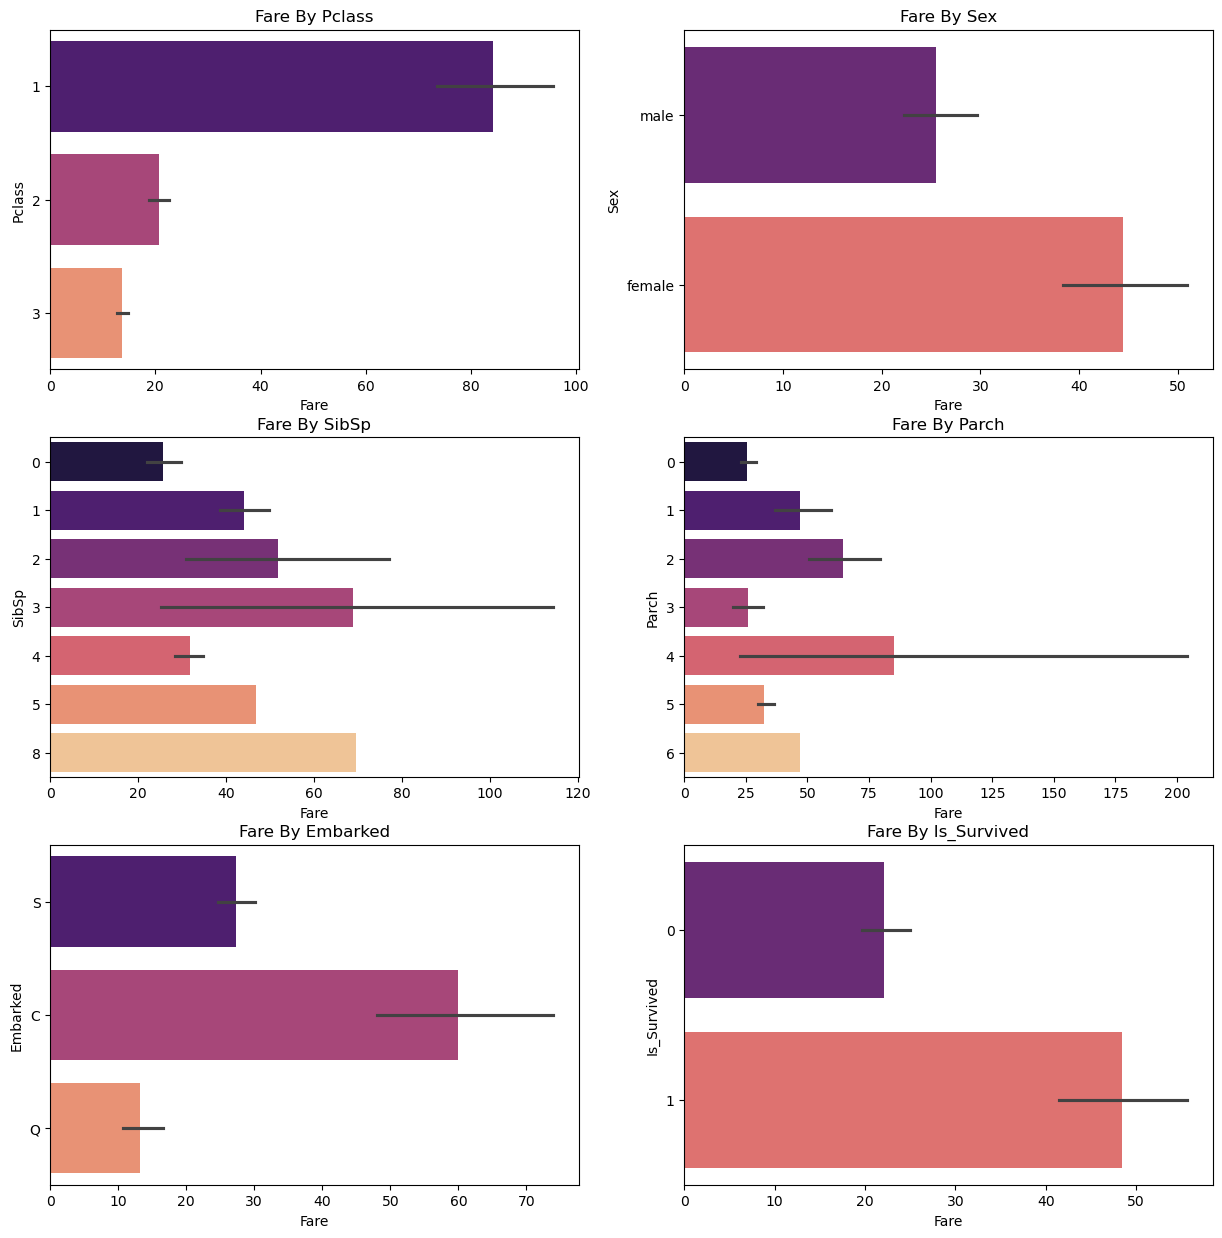

In [28]:
plt.figure(figsize=(15,15))
index=1
for col in data.columns:
    if data[col].nunique()<=10:
        plt.subplot(3,2,index)
        plt.title('Fare By '+col)
        sns.barplot(data=data,x='Fare',y=col,orient='h',palette='magma')
        index+=1
plt.show()        

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3029837475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Age',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3029837475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Age',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3029837475.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=data,x='Age',y=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_

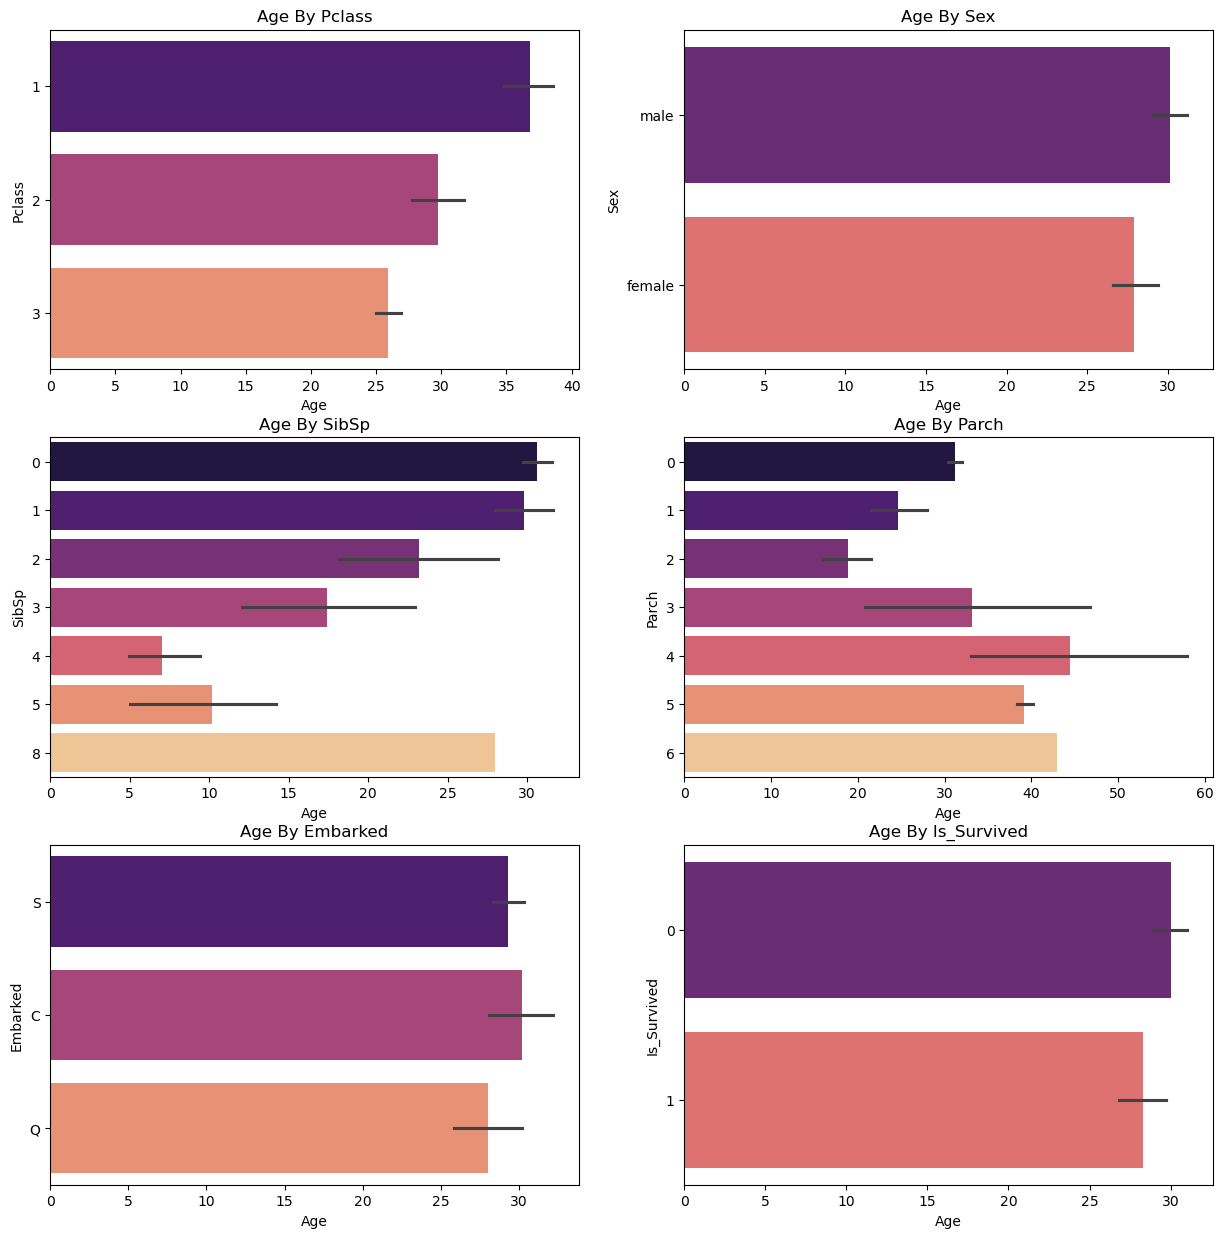

In [29]:
plt.figure(figsize=(15,15))
index=1
for col in data.columns:
    if data[col].nunique()<=10:
        plt.subplot(3,2,index)
        plt.title('Age By '+col)
        sns.barplot(data=data,x='Age',y=col,orient='h',palette='magma')
        index+=1
plt.show()        

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\631690791.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x='Is_Survived',orient='h',palette='magma')


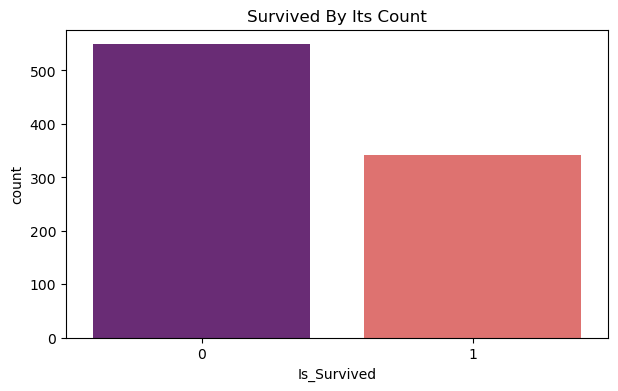

In [47]:
plt.figure(figsize=(7,4))
plt.title('Survived By Its Count')
sns.countplot(data=data,x='Is_Survived',orient='h',palette='magma')
plt.show()

## Data Preprocessing

In [31]:
def convert_obj_num(data):
    lbls={}
    for col in data.columns:
        if data[col].dtype=='object':
            lbl=LabelEncoder()
            data[col]=lbl.fit_transform(data[col])
            lbls[col]=lbl
    return data,lbls 

In [32]:
data,lbls=convert_obj_num(data)

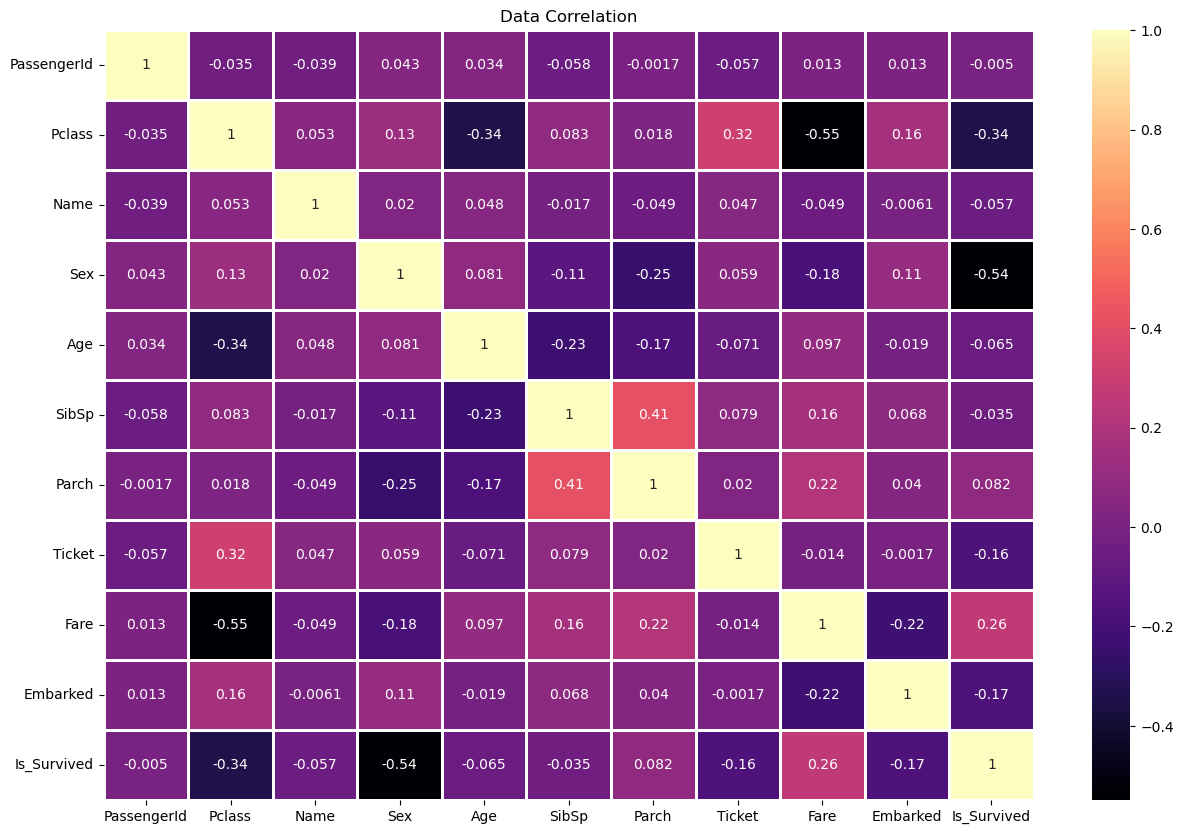

In [33]:
plt.figure(figsize=(15,10))
plt.title('Data Correlation')
sns.heatmap(data.corr(),annot=True,cmap='magma',linecolor='white',linewidths=1.0)
plt.show()

In [34]:
def remove_no_corr(data):
    for col in data.columns:
        if 0.1>=data['Is_Survived'].corr(data[col])>=-0.1:
            data.drop(col,axis=1,inplace=True)
    return data         

In [35]:
data=remove_no_corr(data)

In [36]:
len(data.columns)

6

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: F

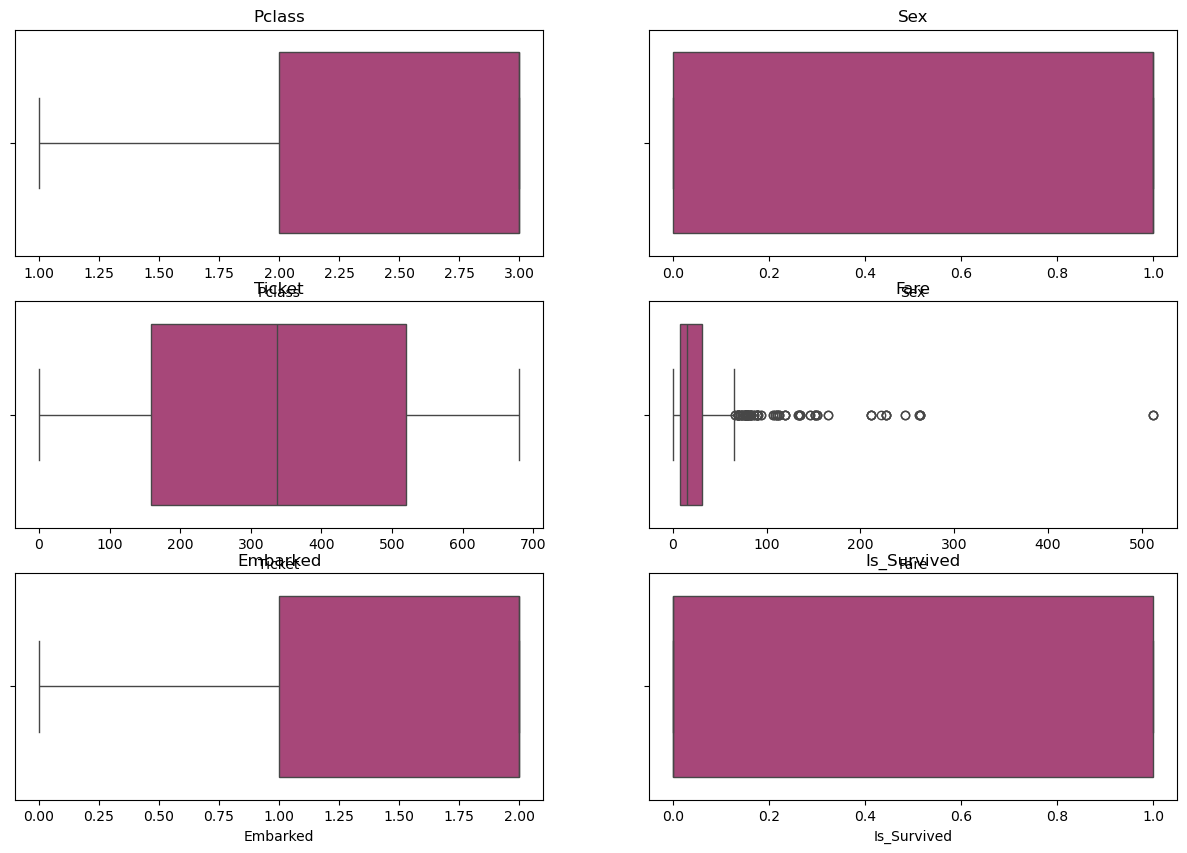

In [38]:
plt.figure(figsize=(15,10))
for col in data.columns:
    plt.subplot(3,2,list(data.columns).index(col)+1)
    plt.title(col)
    sns.boxplot(data=data,x=col,orient='h',palette='magma')
plt.show()    

In [39]:
for col in data.columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower_fence=Q1-(1.5*IQR)
    upper_fence=Q3+(1.5*IQR)
    lower_outliers=data[data[col]<lower_fence][col].values
    upper_outliers=data[data[col]>upper_fence][col].values
    data[col].replace(lower_outliers,lower_fence,inplace=True)
    data[col].replace(upper_outliers,upper_fence,inplace=True)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\1956903361.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\1956903361.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data,x=col,orient='h',palette='magma')
C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\3774739903.py:5: F

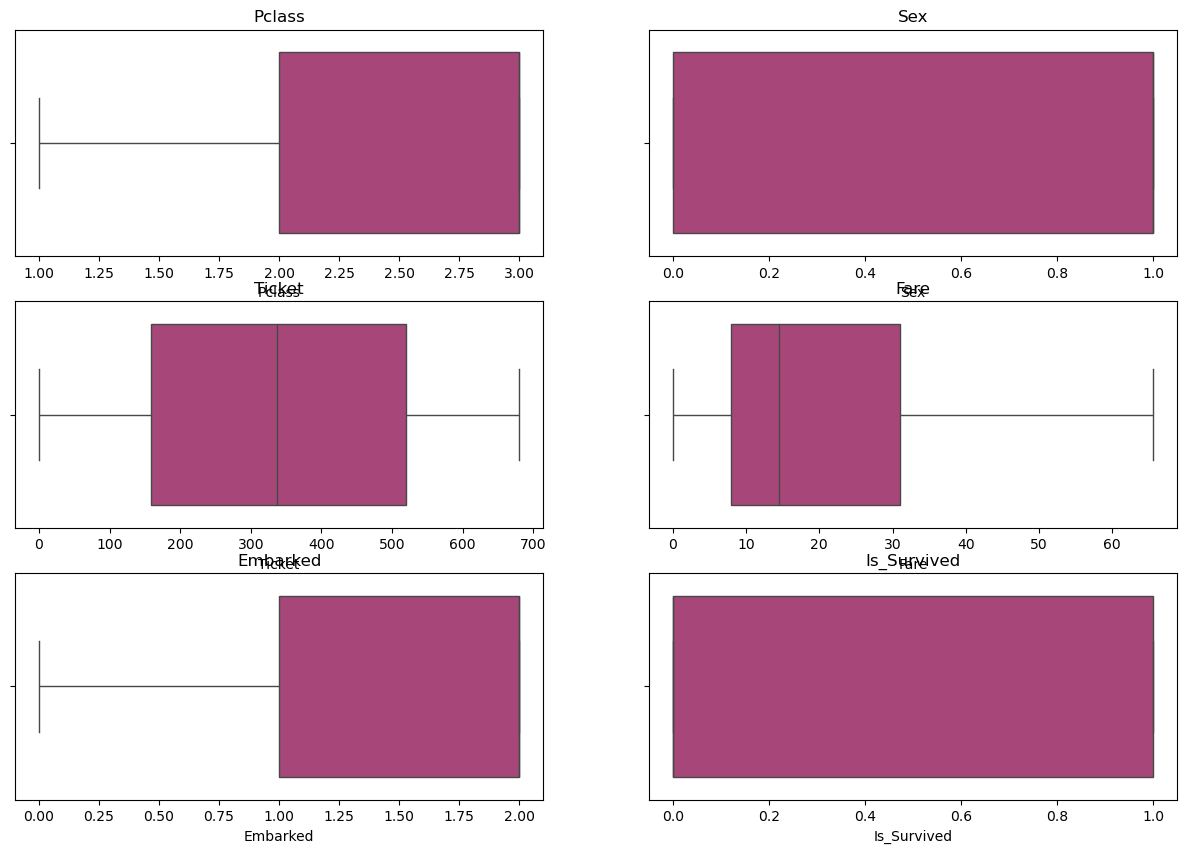

In [40]:
plt.figure(figsize=(15,10))
for col in data.columns:
    plt.subplot(3,2,list(data.columns).index(col)+1)
    plt.title(col)
    sns.boxplot(data=data,x=col,orient='h',palette='magma')
plt.show()    

## Data Splitting 

In [41]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [42]:
def scaling_data(data):
    scalers={}
    for col in data.columns:
        scaler=MinMaxScaler()
        data[col]=scaler.fit_transform(np.array(data[col]).reshape(-1,1))
        scalers[col]=scaler
    return data,scalers    

In [43]:
X,scalers=scaling_data(X)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

In [56]:
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_10388\618516196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=np.array(y_train_resampled),orient='h',palette='magma')


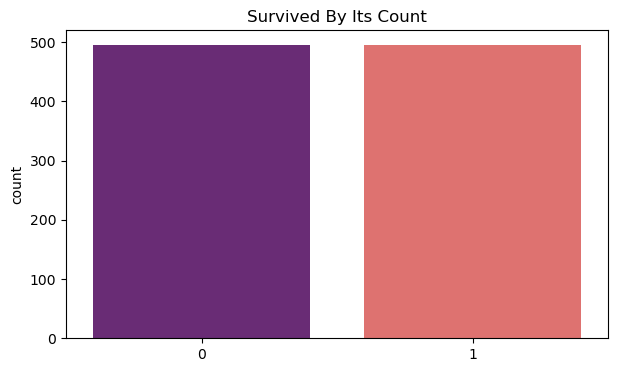

In [57]:
plt.figure(figsize=(7,4))
plt.title('Survived By Its Count')
sns.countplot(x=np.array(y_train_resampled),orient='h',palette='magma')
plt.show()

## Data Modeling and Its Evaluation

Logistic Regression Modeling

In [58]:
LR=LogisticRegression(penalty='l2',C=1,solver='liblinear',random_state=42)
LR.fit(x_train_resampled,y_train_resampled)

LogisticRegression(C=1, random_state=42, solver='liblinear')

In [59]:
predict_train=LR.predict(x_train_resampled)
predict_test=LR.predict(x_test)

In [60]:
acc_train=accuracy_score(y_train_resampled,predict_train)
acc_test=accuracy_score(y_test,predict_test)

In [61]:
print('Training Accuracy : ',round(acc_train*100,2),'%')
print('Testing Accuracy  : ',round(acc_test*100,2),'%')

Training Accuracy :  76.06 %
Testing Accuracy  :  80.0 %


In [75]:
precision=precision_score(y_test,predict_test)
recall=recall_score(y_test,predict_test)

In [63]:
print('Precision : ',round(precision*100,2),'%')
print('Recall    : ',round(recall*100,2),'%')

Precision :  69.57 %
Recall    :  88.89 %


In [65]:
report=classification_report(y_test,predict_test)
print('Classification Report : \n'+report)

Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        54
           1       0.70      0.89      0.78        36

    accuracy                           0.80        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.82      0.80      0.80        90



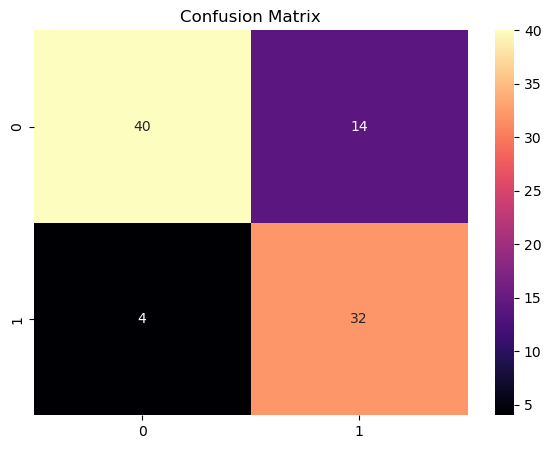

In [69]:
Conf_mat=confusion_matrix(y_test,predict_test)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat,annot=True,cmap='magma')
plt.show()

Applying Cross Validation on Logistic Regression Model

In [82]:
k=KFold(n_splits=5)
scores=cross_val_score(estimator=LR,X=x_train_resampled,y=y_train_resampled,cv=k)

In [85]:
print('Scores            : ',scores)
print('Average of Scores : ',round(scores.mean()*100,2),'%')

Scores            :  [0.8030303  0.74242424 0.70707071 0.76767677 0.68181818]
Average of Scores :  74.04 %


SVM Modeling

In [70]:
svm=SVC(C=1.0,kernel='linear',random_state=42)
svm.fit(x_train_resampled,y_train_resampled)

SVC(kernel='linear', random_state=42)

In [71]:
predict_train1=svm.predict(x_train_resampled)
predict_test1=svm.predict(x_test)

In [72]:
acc_train1=accuracy_score(y_train_resampled,predict_train1)
acc_test1=accuracy_score(y_test,predict_test1)

In [73]:
print('Training Accuracy : ',round(acc_train1*100,2),'%')
print('Testing Accuracy  : ',round(acc_test1*100,2),'%')

Training Accuracy :  75.96 %
Testing Accuracy  :  81.11 %


In [76]:
precision1=precision_score(y_test,predict_test1)
recall1=recall_score(y_test,predict_test1)

In [78]:
print('Precision : ',round(precision1*100,2),'%')
print('Recall    : ',round(recall1*100,2),'%')

Precision :  75.68 %
Recall    :  77.78 %


In [79]:
report1=classification_report(y_test,predict_test1)
print('Classification Report : \n'+report1)

Classification Report : 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        54
           1       0.76      0.78      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.80        90
weighted avg       0.81      0.81      0.81        90



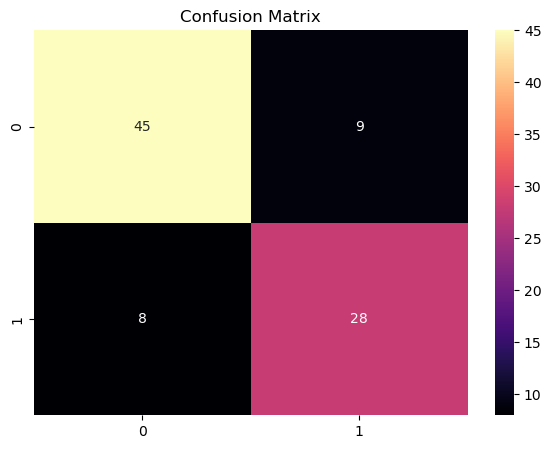

In [80]:
Conf_mat1=confusion_matrix(y_test,predict_test1)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat1,annot=True,cmap='magma')
plt.show()

Decision Tree Modeling

In [103]:
DT=DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=42)
DT.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [104]:
predict_train2=DT.predict(x_train_resampled)
predict_test2=DT.predict(x_test)

In [105]:
acc_train2=accuracy_score(y_train_resampled,predict_train2)
acc_test2=accuracy_score(y_test,predict_test2)

In [106]:
print('Training Accuracy : ',round(acc_train2*100,2),'%')
print('Testing Accuracy  : ',round(acc_test2*100,2),'%')

Training Accuracy :  83.03 %
Testing Accuracy  :  81.11 %


In [107]:
precision2=precision_score(y_test,predict_test2)
recall2=recall_score(y_test,predict_test2)

In [108]:
print('Precision : ',round(precision2*100,2),'%')
print('Recall    : ',round(recall2*100,2),'%')

Precision :  72.09 %
Recall    :  86.11 %


In [109]:
report2=classification_report(y_test,predict_test2)
print('Classification Report : \n'+report2)

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        54
           1       0.72      0.86      0.78        36

    accuracy                           0.81        90
   macro avg       0.81      0.82      0.81        90
weighted avg       0.82      0.81      0.81        90



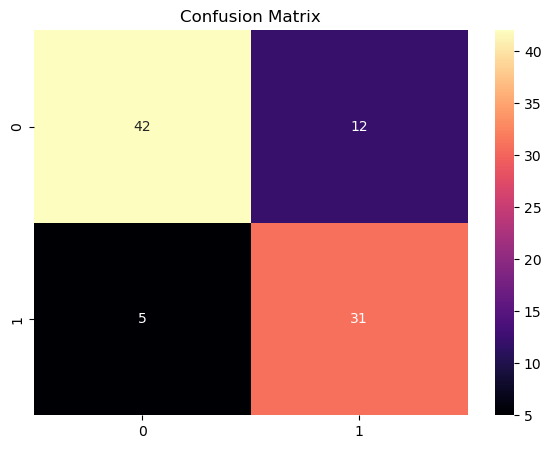

In [110]:
Conf_mat2=confusion_matrix(y_test,predict_test2)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat2,annot=True,cmap='magma')
plt.show()

Random Forest Modeling 

In [115]:
RF=RandomForestClassifier(n_estimators=50,criterion='gini',max_depth=6,random_state=42)
RF.fit(x_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=6, n_estimators=50, random_state=42)

In [116]:
predict_train3=RF.predict(x_train_resampled)
predict_test3=RF.predict(x_test)

In [117]:
acc_train3=accuracy_score(y_train_resampled,predict_train3)
acc_test3=accuracy_score(y_test,predict_test3)

In [118]:
print('Training Accuracy : ',round(acc_train3*100,2),'%')
print('Testing Accuracy  : ',round(acc_test3*100,2),'%')

Training Accuracy :  86.26 %
Testing Accuracy  :  82.22 %


In [119]:
precision3=precision_score(y_test,predict_test3)
recall3=recall_score(y_test,predict_test3)

In [120]:
print('Precision : ',round(precision3*100,2),'%')
print('Recall    : ',round(recall3*100,2),'%')

Precision :  75.0 %
Recall    :  83.33 %


In [121]:
report3=classification_report(y_test,predict_test3)
print('Classification Report : \n'+report3)

Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.81      0.85        54
           1       0.75      0.83      0.79        36

    accuracy                           0.82        90
   macro avg       0.81      0.82      0.82        90
weighted avg       0.83      0.82      0.82        90



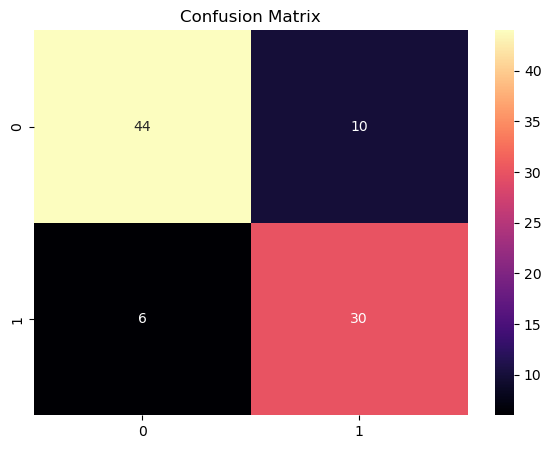

In [122]:
Conf_mat3=confusion_matrix(y_test,predict_test3)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat3,annot=True,cmap='magma')
plt.show()

Boosting Modeling

In [135]:
boost=AdaBoostClassifier(estimator=LR,n_estimators=5,learning_rate=0.01,random_state=42)
boost.fit(x_train_resampled,y_train_resampled)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=LogisticRegression(C=1, random_state=42,
                                                solver='liblinear'),
                   learning_rate=0.01, n_estimators=5, random_state=42)

In [136]:
predict_train4=boost.predict(x_train_resampled)
predict_test4=boost.predict(x_test)

In [137]:
acc_train4=accuracy_score(y_train_resampled,predict_train4)
acc_test4=accuracy_score(y_test,predict_test4)

In [138]:
print('Training Accuracy : ',round(acc_train4*100,2),'%')
print('Testing Accuracy  : ',round(acc_test4*100,2),'%')

Training Accuracy :  63.94 %
Testing Accuracy  :  77.78 %


In [139]:
precision4=precision_score(y_test,predict_test4)
recall4=recall_score(y_test,predict_test4)

In [140]:
print('Precision : ',round(precision4*100,2),'%')
print('Recall    : ',round(recall4*100,2),'%')

Precision :  100.0 %
Recall    :  44.44 %


In [141]:
report4=classification_report(y_test,predict_test4)
print('Classification Report : \n'+report4)

Classification Report : 
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        54
           1       1.00      0.44      0.62        36

    accuracy                           0.78        90
   macro avg       0.86      0.72      0.73        90
weighted avg       0.84      0.78      0.75        90



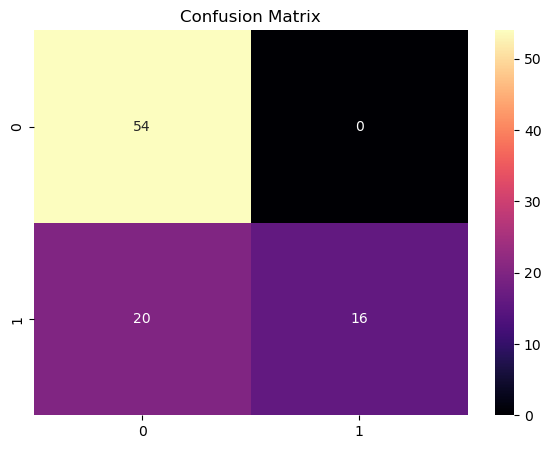

In [142]:
Conf_mat4=confusion_matrix(y_test,predict_test4)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat4,annot=True,cmap='magma')
plt.show()

Bagging Modeling

In [143]:
bagging=BaggingClassifier(estimator=LR,n_estimators=5,random_state=42)
bagging.fit(x_train_resampled,y_train_resampled)

BaggingClassifier(estimator=LogisticRegression(C=1, random_state=42,
                                               solver='liblinear'),
                  n_estimators=5, random_state=42)

In [144]:
predict_train5=bagging.predict(x_train_resampled)
predict_test5=bagging.predict(x_test)

In [145]:
acc_train5=accuracy_score(y_train_resampled,predict_train5)
acc_test5=accuracy_score(y_test,predict_test5)

In [146]:
print('Training Accuracy : ',round(acc_train5*100,2),'%')
print('Testing Accuracy  : ',round(acc_test5*100,2),'%')

Training Accuracy :  76.36 %
Testing Accuracy  :  78.89 %


In [147]:
precision5=precision_score(y_test,predict_test5)
recall5=recall_score(y_test,predict_test5)

In [148]:
print('Precision : ',round(precision5*100,2),'%')
print('Recall    : ',round(recall5*100,2),'%')

Precision :  68.89 %
Recall    :  86.11 %


In [149]:
report5=classification_report(y_test,predict_test5)
print('Classification Report : \n'+report5)

Classification Report : 
              precision    recall  f1-score   support

           0       0.89      0.74      0.81        54
           1       0.69      0.86      0.77        36

    accuracy                           0.79        90
   macro avg       0.79      0.80      0.79        90
weighted avg       0.81      0.79      0.79        90



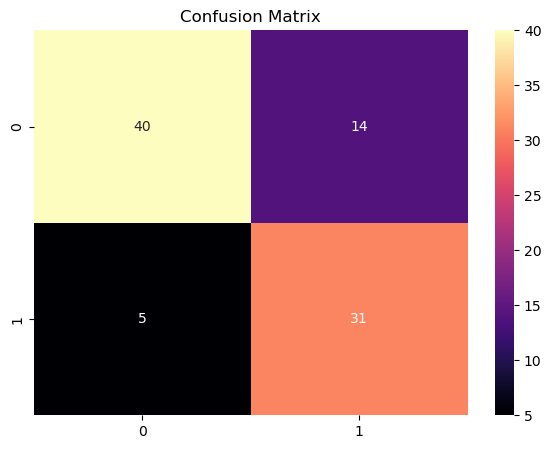

In [150]:
Conf_mat5=confusion_matrix(y_test,predict_test5)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat5,annot=True,cmap='magma')
plt.show()

KNN Modeling

In [151]:
knn=KNeighborsClassifier(n_neighbors=5,algorithm='auto')
knn.fit(x_train_resampled,y_train_resampled)

KNeighborsClassifier()

In [152]:
predict_train6=knn.predict(x_train_resampled)
predict_test6=knn.predict(x_test)

In [153]:
acc_train6=accuracy_score(y_train_resampled,predict_train6)
acc_test6=accuracy_score(y_test,predict_test6)

In [154]:
print('Training Accuracy : ',round(acc_train6*100,2),'%')
print('Testing Accuracy  : ',round(acc_test6*100,2),'%')

Training Accuracy :  84.44 %
Testing Accuracy  :  81.11 %


In [155]:
precision6=precision_score(y_test,predict_test6)
recall6=recall_score(y_test,predict_test6)

In [156]:
print('Precision : ',round(precision6*100,2),'%')
print('Recall    : ',round(recall6*100,2),'%')

Precision :  74.36 %
Recall    :  80.56 %


In [157]:
report6=classification_report(y_test,predict_test6)
print('Classification Report : \n'+report6)

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.81      0.84        54
           1       0.74      0.81      0.77        36

    accuracy                           0.81        90
   macro avg       0.80      0.81      0.81        90
weighted avg       0.82      0.81      0.81        90



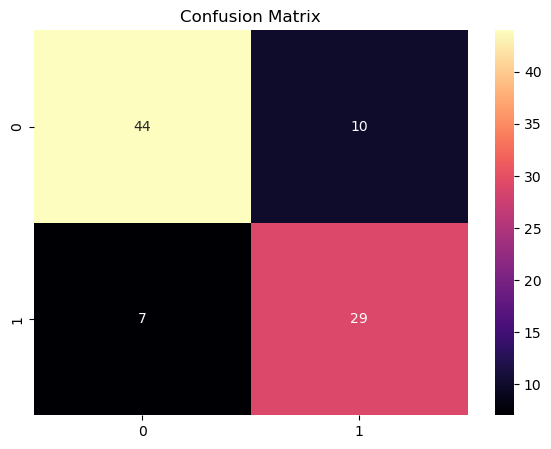

In [158]:
Conf_mat6=confusion_matrix(y_test,predict_test6)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat6,annot=True,cmap='magma')
plt.show()

Naive Bayes Modeling

In [159]:
NB=GaussianNB()
NB.fit(x_train_resampled,y_train_resampled)

GaussianNB()

In [160]:
predict_train7=NB.predict(x_train_resampled)
predict_test7=NB.predict(x_test)

In [161]:
acc_train7=accuracy_score(y_train_resampled,predict_train7)
acc_test7=accuracy_score(y_test,predict_test7)

In [162]:
print('Training Accuracy : ',round(acc_train7*100,2),'%')
print('Testing Accuracy  : ',round(acc_test7*100,2),'%')

Training Accuracy :  75.05 %
Testing Accuracy  :  76.67 %


In [163]:
precision7=precision_score(y_test,predict_test7)
recall7=recall_score(y_test,predict_test7)

In [164]:
print('Precision : ',round(precision7*100,2),'%')
print('Recall    : ',round(recall7*100,2),'%')

Precision :  64.71 %
Recall    :  91.67 %


In [165]:
report7=classification_report(y_test,predict_test7)
print('Classification Report : \n'+report7)

Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.67      0.77        54
           1       0.65      0.92      0.76        36

    accuracy                           0.77        90
   macro avg       0.79      0.79      0.77        90
weighted avg       0.81      0.77      0.77        90



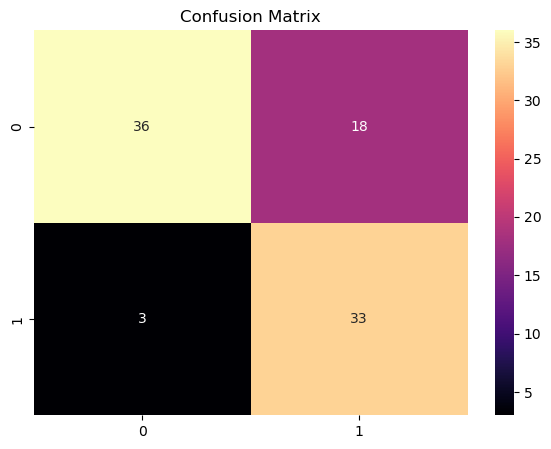

In [166]:
Conf_mat7=confusion_matrix(y_test,predict_test7)
plt.figure(figsize=(7,5))
plt.title("Confusion Matrix")
sns.heatmap(Conf_mat7,annot=True,cmap='magma')
plt.show()

## Saving Label Encoders and Scalers

In [167]:
pickle.dump(lbls,open(r'lbls&scalers\label_encoders.pkl','wb'))
pickle.dump(scalers,open(r'lbls&scalers\scalers.pkl','wb'))

## Loading Label Encoders and Scalers

In [2]:
def load_lbls_scalers():
    lbls=pickle.load(open(r'lbls&scalers\label_encoders.pkl','rb'))
    scalers=pickle.load(open(r'lbls&scalers\scalers.pkl','rb'))
    return lbls,scalers

In [3]:
lbls,scalers=load_lbls_scalers()

## Saving Models

In [170]:
pickle.dump(LR,open(r'models\logistic_regression_model.pkl','wb'))
pickle.dump(svm,open(r'models\SVM_model.pkl','wb'))
pickle.dump(DT,open(r'models\decision_tree_model.pkl','wb'))
pickle.dump(RF,open(r'models\random_forest_model.pkl','wb'))
pickle.dump(boost,open(r'models\boosting_model.pkl','wb'))
pickle.dump(bagging,open(r'models\bagging_model.pkl','wb'))
pickle.dump(knn,open(r'models\knn_model.pkl','wb'))
pickle.dump(NB,open(r'models\naive_bayes_model.pkl','wb'))

## Loading Models

In [4]:
def load_models():
    LR=pickle.load(open(r'models\logistic_regression_model.pkl','rb'))
    svm=pickle.load(open(r'models\SVM_model.pkl','rb'))
    DT=pickle.load(open(r'models\decision_tree_model.pkl','rb'))
    RF=pickle.load(open(r'models\random_forest_model.pkl','rb'))
    boost=pickle.load(open(r'models\boosting_model.pkl','rb'))
    bagging=pickle.load(open(r'models\bagging_model.pkl','rb'))
    knn=pickle.load(open(r'models\knn_model.pkl','rb'))
    NB=pickle.load(open(r'models\naive_bayes_model.pkl','rb'))
    return LR,svm,DT,RF,boost,bagging,knn,NB

In [5]:
LR,svm,DT,RF,boost,bagging,knn,NB=load_models()

## Testing Models by a Test Record  

In [173]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       891 non-null    int64  
 1   Sex          891 non-null    int32  
 2   Ticket       891 non-null    int32  
 3   Fare         891 non-null    float64
 4   Embarked     891 non-null    int32  
 5   Is_Survived  891 non-null    int64  
dtypes: float64(1), int32(3), int64(2)
memory usage: 31.5 KB


In [24]:
def preprocess_new_record(pclass,sex,ticket,fare,embarked):
    record=[pclass,sex,ticket,fare,embarked]
    preprocessed_record=[]
    lbls_index=1
    for index in range(len(record)):
        if type(record[index])==type(2) or type(record[index])==type(2.0):
            new_val=scalers[list(scalers.keys())[index]].transform(np.array([record[index]]).reshape(-1,1))
        else:
            new_val=lbls[list(lbls.keys())[lbls_index]].transform(np.array([record[index]]).reshape(-1,1))
            new_val=scalers[list(scalers.keys())[index]].transform(np.array([new_val]).reshape(-1,1))
            lbls_index+=1
        preprocessed_record.append(new_val[0][0])
    preprocessed_record=np.array(preprocessed_record)
    preprocessed_record=preprocessed_record.reshape(1,-1)
    return preprocessed_record            

In [25]:
pclass=2
sex='male'
ticket='PC 17599'
fare=1500.60
embarked='C'

In [26]:
test_record=preprocess_new_record(pclass,sex,ticket,fare,embarked)

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [29]:
def generate_predict_label(prediction):
    if prediction[0]==1:
        return 'Survived'
    else:
        return 'not Survived'

In [27]:
prediction=LR.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [30]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

Survived


In [31]:
prediction=svm.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [32]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

not Survived


In [33]:
prediction=DT.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

not Survived


In [35]:
prediction=RF.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [36]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

not Survived


In [37]:
prediction=boost.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [38]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

Survived


In [39]:
prediction=bagging.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [40]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

Survived


In [41]:
prediction=knn.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [42]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

not Survived


In [43]:
prediction=NB.predict(test_record)
prediction

c:\Users\Mahmoud\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [44]:
pred_lbl=generate_predict_label(prediction)
print(pred_lbl)

Survived
